<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initialization-and-Program-Settings" data-toc-modified-id="Initialization-and-Program-Settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initialization and Program Settings</a></span><ul class="toc-item"><li><span><a href="#Loading-Packages" data-toc-modified-id="Loading-Packages-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Loading Packages</a></span></li><li><span><a href="#Visualization-Preferences" data-toc-modified-id="Visualization-Preferences-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Visualization Preferences</a></span><ul class="toc-item"><li><span><a href="#For-Science" data-toc-modified-id="For-Science-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>For Science</a></span></li><li><span><a href="#Cinematic" data-toc-modified-id="Cinematic-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Cinematic</a></span></li></ul></li><li><span><a href="#Folder-and-Space-Management:" data-toc-modified-id="Folder-and-Space-Management:-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Folder and Space Management:</a></span></li></ul></li><li><span><a href="#Base-Parameters" data-toc-modified-id="Base-Parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Base Parameters</a></span></li><li><span><a href="#Configure-the-Wind" data-toc-modified-id="Configure-the-Wind-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Configure the Wind</a></span></li><li><span><a href="#Compiling-and-Go" data-toc-modified-id="Compiling-and-Go-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Compiling and Go</a></span><ul class="toc-item"><li><span><a href="#Gravitational-Field-Smoothing" data-toc-modified-id="Gravitational-Field-Smoothing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span><font color="green">Gravitational Field Smoothing</font></a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Simulation</a></span><ul class="toc-item"><li><span><a href="#Step-Number-Estimation" data-toc-modified-id="Step-Number-Estimation-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Step Number Estimation</a></span></li><li><span><a href="#Go" data-toc-modified-id="Go-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Go</a></span></li></ul></li></ul></li><li><span><a href="#Data-(Re)Loading:" data-toc-modified-id="Data-(Re)Loading:-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data (Re)Loading:</a></span></li><li><span><a href="#Analysis-Suite" data-toc-modified-id="Analysis-Suite-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analysis Suite</a></span><ul class="toc-item"><li><span><a href="#Restoring-Physical-Units" data-toc-modified-id="Restoring-Physical-Units-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Restoring Physical Units</a></span></li><li><span><a href="#2D-Trajectory-Plot" data-toc-modified-id="2D-Trajectory-Plot-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>2D Trajectory Plot</a></span></li><li><span><a href="#Energy" data-toc-modified-id="Energy-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Energy</a></span></li><li><span><a href="#2D-Complex-Field" data-toc-modified-id="2D-Complex-Field-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>2D Complex Field</a></span></li><li><span><a href="#[1D-Mass-Density]" data-toc-modified-id="[1D-Mass-Density]-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>[1D Mass Density]</a></span></li><li><span><a href="#3D-Gravitational-Field-Slice" data-toc-modified-id="3D-Gravitational-Field-Slice-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>3D Gravitational Field Slice</a></span></li></ul></li><li><span><a href="#[Dynamical-Friction-Workbench-2]" data-toc-modified-id="[Dynamical-Friction-Workbench-2]-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>[Dynamical Friction Workbench 2]</a></span></li></ul></div>

<a id='init'></a>
# Initialization and Program Settings

## Loading Packages



In [ ]:
%reset

In [ ]:
###### Do not touch
MinVersion = 17

import PyUltraLight_NBody_W as PyUL

if (PyUL.S_version < MinVersion):
    raise RuntimeError("You need the latest PyULN!")

import numpy as np
np.set_printoptions(suppress=True)

import math

import numba
import numexpr as ne
import time
import pyfftw
import os
import sys
import multiprocessing
import numpy

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec
import matplotlib.animation
from matplotlib.offsetbox import AnchoredText

import scipy.fft

import h5py
from IPython.core.display import clear_output, display

%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Visualization Preferences
Initialize the colors of black holes, contours, and energy lines.

### For Science

In [ ]:
Palette = 'cool'
CycPalette = 'Greys'
mpl.style.use('seaborn')
########################################
## Defines Visualization Colors, v0.25
# BH Trajectory

Colors = np.array([[209,17,65],[0,177,89],[0,174,219],[243,119,53],[255,196,37]])/255

# NBody
ENStyle = '-.'
ENColor = '#cfaf8a' # NBody

EKColor = '#cf838a'
EPColor = '#8acf99'

# ULDM
EUStyle = '--'
EUColor = '#8d4b66' # ULDM

EQColor = '#4d7e4e' # Kinetic 
ERColor = '#545b7e' # Self-Interaction
EGColor = '#69567c' # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#272727'

# Auxiliary 
HelperStyle = 'k.'

### Cinematic

In [ ]:
Palette = 'magma'
CycPalette = 'twilight'
mpl.style.use('dark_background')
########################################
## Defines Visualization Colors, v0.25
# BH Trajectory

Colors = np.array([[209,17,65],[0,177,89],[0,174,219],[243,119,53],[255,196,37]])/255

# NBody
ENStyle = '--'
ENColor = '#cfaf8a' # NBody

EKColor = '#cf838a'
EPColor = '#8acf99'

# ULDM
EUStyle = '-.'
EUColor = '#8d4b66' # ULDM

EQColor = '#4d7e4e' # Kinetic 
ERColor = '#545b7e' # Self-Interaction
EGColor = '#69567c' # Particle Potential

# Totals
ETStyle = '-'
ETColor = '#a7a7a7'

# Auxiliary 
HelperStyle = 'w.'

## Folder and Space Management:

In [ ]:
save_path = '2021QuantumWind'  # Set Output Directory

In [ ]:
PyUL.DSManagement(save_path)

[**<font color=blue>Back to the Top</font>**](#root)
<a id='ULSettings'></a>
# Base Parameters

In [ ]:
##================================================================
# Snapshot Settings
save_number = 60

start_time = 0.

# Runge-Kutta Steps for NBody
NS = 16 # 0,1,4,8,16,... Number of RK4 steps per ULDM update. Set NS to 0 to freeze the BH in place.

# Default Resolution
resol = 128

#Formats to save
hdf5 = False
npz = False
npy = True

#Data to save
#0
save_rho = False # Saves density data for entire 3D simulation grid
#1
save_psi = False # Saves ULD Phase Data in plane
#2
save_plane = True # Saves density data for plane z = 0
#3
save_energies = True # Saves integrated gravitational, kinetic and total energies as lists
#4
save_line = False # Saves density data for line y = 0, z = 0. Useful for examining intereference patterns.
#5
save_testmass = True # Saves trajectory and 3-velocity of a test mass thrown into the system. 
#6
save_phi = False
#7
save_phi_plane = True
#8
save_gradients = True
#9
save_phase_plane = True

save_options = [save_rho,save_psi,save_plane,save_energies,save_line,save_testmass,save_phi,save_phi_plane,save_gradients,save_phase_plane]

SaveSizeEstimate = PyUL.SSEst(save_options,save_number,resol)

print('Estimated Save Size (GiB): %.03f' % SaveSizeEstimate )

#================================================================
# Do not touch
resol = (scipy.fft.next_fast_len(resol)) # Uses a nearby and faster resolution.
while resol%2:
    resol = scipy.fft.next_fast_len(resol+1)
    print(resol)
num_threads = multiprocessing.cpu_count()
print("Available CPU threads for this run: ",num_threads)

[**<font color=green>Go to Execution</font>**](#run)
<a id='demo_byo'></a>
# Configure the Wind



In this version, you have a limited range of parameters, as PyUL2QW is not programmed to take a full input, and feature some exclusive mathematical optimisations for a plane wave initial condition.

In [ ]:
######## USER PARAMETERS BELOW ################################

speed, s_velocity_unit = (200,'km/s')

BHSpeedMultiplier = 0 # 1 = Comoving, -1 = Against, 0 = Stationary 

length_units = 'kpc'

duration = 3 #1 code unit is ~70 Gyr (independent of axion mass assumption)
duration_units = 'Myr'  # Accepted units: 's', 'yr', 'kyr', 'Myr', and '' for dimensionless units


NdB = 2 # Number of deBroglie wavelengths that fit in the simulation



mBH1, m_mass_units = 50 , 'M_solar_masses'

######## PRESET PARAMETERS BELOW ################################

# de Broglie in Lab Frame is the Quantum Wind wavelength

lbasic = PyUL.convert_back(np.pi*2/PyUL.convert(speed,s_velocity_unit,'v'),length_units,'l')

resol = NdB*32 # This looks like it's a good fit

print(f'Quantum de Broglie wavelength: {lbasic:.4g} {length_units}')

length = NdB*lbasic # Can be changed to fit more wavelengths.

print(f'Simulation domain edge length: {length:.4g} {length_units}')

Uniform = True
Density = 1e9   # 1 Code unit is 0.31*Critical Density

##================================================================
## Other Units
# Set units for soliton parameters
    
s_position_unit = length_units
m_position_unit = length_units
m_velocity_unit = s_velocity_unit

s_mass_unit = ''
density_unit = ''
# 1 Code Density Unit is equal the universe's critical matter density, 2.67e-27 kg/m^3.
 # Accepted units: 'MSol/pc3', 'kg/m3', and '' for dimensionless units

##================================================================


particles = [[mBH1,[0,length/6,0],[0,-speed*BHSpeedMultiplier,0]]]

solitons = []

embeds = []

# particles = PyULH.PopulateBHWithStars(particles,rIn = 0.00009, rOut = 0.0015,InBias = 0, NStars = 14, MassMax = 0)

########### MODIFIER PARAMETERS

# Removes all ULDM Structures defined elsewhere in the IV and replaces them with a uniform wavefunction 
# with given probability amplitude (code unit).


UVel = [0,-speed,0] # Uses s_velocity_units
#Density = 0



[**<font color=blue>Back to the Top</font>**](#root)
<a id='run'></a>
# Compiling and Go

This creates a timestamped folder using the current settings, and the integrator stores all requested files in it too.

## <font color=green>Gravitational Field Smoothing</font>
Instead of coding in the idealistic $\frac{m}{r}$ potential, we approximate it with $\frac{am}{ar+e^{-ar}}$. 

The modified potential is a useful approximation of a point mass in a distance, and puts an exponential cap on the infinite potential well, which reduces the impact of numerical artefacts.


The smoothing factor, $a$, is also defined here.


The differences between the two potentials are characterised in the program output box.

Set $a = 0$ to disable field smoothing.

In [ ]:
lengthC = PyUL.convert(length, length_units, 'l')

GridlenC = lengthC/(resol)

print(f"The grid subdivision is {length/resol:.4f} in specified units. This is {GridlenC:.4f} code units.")

central_mass = 0 # Not Implemented Anymore. Keep for backwards compatibility.
#================================================================
a = (2-PyUL.LW(np.exp(-2)))/lengthC*resol
a = np.real(a)/3
# Field Cut-off Factor
#================================================================
#Specify b, the distance beyond which ULDM field does not feel the NBody. Version 1

print(f"The Smoothing factor is {a:.3f}")

B = 0 # No longer used.

if a != 0:
    PyUL.SmoothingReport(a,resol,lengthC)

## Simulation

### Step Number Estimation
If you see a crazy number here, it might be a good idea to increase step_factor or use a bigger box.

In [ ]:
step_factor = 1

PyUL.DispN(duration,duration_units,length,length_units,resol,step_factor)

### Go

In [ ]:
NoInteraction = False
Name = ''

Draft = True # Soliton Resolution Switch. Production Resol: 1e-5, Draft: 1e-3.
EdgeClear = False # Clear Edge (Rudimentary Sponge)
DumpInit = False # Dump Initial Conditions into ChplUltra-compliant Files
IsoP = False # Use Isolated Potential
UseDispSponge = False # Use Dispersive Sponge (Default Setting: Sponge Thickness = 1/4*L)

run_folder = PyUL.GenerateConfig(NS, central_mass, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, save_path, npz, npy, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles,embeds, Uniform,Density,density_unit,a,B,UVel,NoInteraction,Name)

PyUL.evolve(save_path,run_folder,Draft = Draft, EdgeClear = EdgeClear, DumpInit = DumpInit, IsoP = IsoP, UseDispSponge = UseDispSponge) 

[**<font color=blue>Back to the Top</font>**](#root)
<a id='load'></a>
# Data (Re)Loading:

This block loads all data produced into memory.

In [ ]:
TimeStamp = PyUL.Runs(save_path)
clear_output()
loc = './' + save_path + '/' + TimeStamp
print(loc,'\n')
# Reload Config

NS, central_mass, length, length_units, resol, duration, duration_units, step_factor, save_number, save_options, npz, npy, hdf5, s_mass_unit, s_position_unit, s_velocity_unit, solitons,start_time, m_mass_unit, m_position_unit, m_velocity_unit, particles, embeds, Uniform,Density, density_unit ,a, B, UVel = PyUL.LoadConfig(loc)

# Reload Output

EndNum, data, TMdata, phidata, graddata, phasedata = PyUL.Load_Data(save_path,TimeStamp, save_options,save_number)

NBo = len(particles)


[**<font color=blue>Back to the Top</font>**](#root)
<a id='plot'></a>
# Analysis Suite

## Restoring Physical Units

The procedures below do not touch the code output directly, and appropriate pre-multiplied factors need to be applied if you intend to use the data elsewhere to restore physial units

In [ ]:
ToCode = PyUL.convert
ToPhys = PyUL.convert_back
CB = PyUL.convert_between

# Time
durationMyr = ToPhys(ToCode(duration,duration_units,'t'),'Myr','t') * (EndNum-1) / save_number

# Space
lengthKpc = ToPhys(ToCode(length,length_units,'l'),'kpc','l')

# Mass

MassList_MSol = []
MassListSI = []
for TM in particles:
    MassList_MSol.append(CB(TM[0],m_mass_unit,'M_solar_masses','m'))
    MassListSI.append(CB(TM[0],m_mass_unit,'kg','m'))
    
# Density
densitySI = ToPhys(ToCode(Density,density_unit,'d'),'kg/m3','d')

## Misc. Pre-Multipliers

# NBody_State Vector

XPre = ToPhys(1,'kpc','l')
VPre = ToPhys(1,'km/s','v')

XPreSI = ToPhys(1,'m','l')
VPreSI = ToPhys(1,'m/s','v')

IArray = np.arange(len(TMdata[0]))

# Dimensionful NBody State

TMDataS = np.array(TMdata)
TMDataSI = np.array(TMdata)

TMDataS[:,IArray % 6 <= 2] *= XPre
TMDataS[:,IArray % 6 >= 3] *= VPre

TMDataSI[:,IArray % 6 <= 2] *= XPreSI
TMDataSI[:,IArray % 6 >= 3] *= VPreSI


# Rho data

DPre = ToPhys(1,'kg/m3','d')

# Energy
EPre = PyUL.energy_unit

# Field Strength
PPre = PyUL.mass_unit / PyUL.length_unit


print('Unit conversion ready!')


print("==============================================")
print(f"PyULN: Axion Mass Used is {PyUL.axion_E} eV.\n")

print(f"\
1 Mass Unit    = {PyUL.mass_unit:.5g} kg = {PyUL.convert_back(1,'solar_masses','m'):.4g} MSol\n\
1 Length Unit  = {PyUL.length_unit:.5g} m  = {PyUL.convert_back(1,'kpc','l'):.4g} kpc\n\
1 Time Unit    = {PyUL.time_unit:.5g} s  = {PyUL.convert_back(1,'Myr','t')/1000:.4g} Gyr\n\n\
1 Density Unit = {PyUL.mass_unit/PyUL.length_unit**3:.5g} kg/m^3 = {PyUL.mass_unit/PyUL.length_unit**3/PyUL.CritDens} Critical Density\n\
1 Speed Unit   = {PyUL.length_unit/PyUL.time_unit:.5g} m/s\n\
1 Energy Unit  = {EPre:.5g} Joules\n")

## 2D Trajectory Plot

In [ ]:
Plot_ULD = True
# Number of ULDM Slices IN BETWEEN start and end (which are always plotted).
NSlices = 5
Zoom2D = 1

if NSlices >= EndNum:
    
    NSlices = EndNum

try:
    TSD = TimeStamp
except NameError:
    TimeStamp = 'Debug'

plt.clf()

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)

Boundary = lengthKpc/(2*Zoom2D)

plt.xlim([-Boundary,Boundary])
plt.ylim([-Boundary,Boundary])

ax.set_aspect('equal', adjustable='box')

for i in range(EndNum):
    
    TMStateLoc = TMDataS[i,:]

    
    if i == 0:
        for particleID in range(len(particles)):

            Color = Colors[np.mod(particleID,5)] # 0, 0.5
        
            TMx = TMStateLoc[int(6*particleID+1)]
            TMy = TMStateLoc[int(6*particleID)]
            plt.plot([TMx],[TMy],'o',color=(0.5*Color[0],0.5*Color[1],0.5*Color[2],1))
        
    
    Alpha = 0.1+9*i/(10*EndNum)
    
    for particleID in range(len(particles)):
        

        Color = Colors[np.mod(particleID,5)] # 0, 0.5
  
        TMx = TMStateLoc[int(6*particleID+1)]
        TMy = TMStateLoc[int(6*particleID)]
        plt.scatter([TMx],[TMy],color=(Color[0],Color[1],Color[2],Alpha))
        
if Plot_ULD:
    
    planemax = np.max(data)
    planemin = np.min(data)

    levels = np.linspace(planemin, planemax, int(resol/16))

    PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)
    
    plt.contour(PlotRange,PlotRange,data[1], levels=levels,cmap = Palette)
    plt.contour(PlotRange,PlotRange,data[EndNum-1], levels=levels,cmap = Palette)


    if NSlices != 0 and EndNum >= NSlices:

        Blink = EndNum/(NSlices+1)

        Index = np.linspace(Blink,EndNum-Blink,NSlices)

        for Ind in Index:
            j = int(Ind)
            plt.contour(PlotRange,PlotRange,data[j], levels=levels,cmap = Palette)

        
ax.grid(True)

if B == 0:
    BDisp = '∞'
else:
    BDisp = f'{B:3f} Grid Length'

Info = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    r'Resolution: $%.0f^3$' % (resol, ),
    r'NBody Cutoff: %s' % (BDisp),
    r'Box Length: %.3g kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3g Myr' % (durationMyr, ),
    r'Saved Snapshots: %.0f (%.0f Plotted)' % (EndNum,NSlices + 2)
    ))



# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# place a text box in bottom left in axes coords
ax.text(0, 0, Info, transform=ax.transAxes, fontsize=11,
        verticalalignment='bottom', bbox=props)

if Zoom2D != 1:
    
    props2 = dict(boxstyle='round', facecolor='lightgreen', alpha=0.5)

    Zinfo = f"Zoom Level: {Zoom2D}x"
    ax.text(0.82, 0.95, Zinfo, transform=ax.transAxes, fontsize=12,
            verticalalignment='bottom', bbox=props2)
    
ax.set_xlabel('$x$ (kpc)')
ax.set_ylabel('$y$ (kpc)')

TrajName = '{}{}{}{}{}'.format("./",save_path,"/_",TimeStamp,'.jpg')
plt.savefig(TrajName, format='jpg', dpi=72)

plt.show()

## Energy

In [ ]:
EFigSize = (9,6)
EFigSize_Mono = (9,4)

Snap = False
loc = save_path + '/' + TimeStamp

plt.clf()

#==================================================================================================
## Naming
EnergyName = '{}{}{}'.format("./",loc,"/Energy_Total.jpg")
EnergyDName = '{}{}{}'.format("./",loc,"/Energy_Delta.jpg")
EnergyMName = '{}{}{}'.format("./",loc,"/Energy_Mech.jpg")
EnergyD2Name = '{}{}{}'.format("./",loc,"/Energy_Pct.jpg")

#==================================================================================================
## Analysis
#
# Load ULDM Energy

egylist = np.load('{}{}'.format(loc, '/Outputs/egylist.npy'),allow_pickle=True) * EPre
egpcmlist2 = np.load('{}{}'.format(loc, '/Outputs/egpcmlist.npy'),allow_pickle=True) * EPre
egpcmlist= np.load('{}{}'.format(loc, '/Outputs/egpcmMlist.npy'),allow_pickle=True) * EPre # Using Interpolation
egpsilist = np.load('{}{}'.format(loc, '/Outputs/egpsilist.npy'),allow_pickle=True) * EPre
ekandqlist = np.load('{}{}'.format(loc, '/Outputs/ekandqlist.npy'),allow_pickle=True) * EPre
mtotlist = np.load('{}{}'.format(loc, '/Outputs/masseslist.npy'),allow_pickle=True) * EPre

# Uniform Correction Performed in Integrator!

# Reconstruct NBody Energy (Real)
#NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum, a, length_units)

# Reconstruct NBody Energy (Physical)
NBo, KS, PS = PyUL.NBodyEnergy(MassListSI,TMDataSI,EndNum)

# Translating Snapshots back to Time
timerange = np.linspace(0,durationMyr,save_number+1)

Tp = np.linspace(0,EndNum-1,EndNum)
Tp = Tp * durationMyr / (save_number+1)

Tpt = np.linspace(1,EndNum,EndNum-2,endpoint = False) 
Tpt = Tpt/(save_number+1) * durationMyr

KSD = KS - KS[1]
PSD = PS - PS[1]

egylistD = egylist - egylist[1]
TotalED = PSD+KSD+egylistD

MES = PS + KS

MESD = PSD + KSD

MESGrad = np.sum(MESD)/np.sum(Tp)

TotalER = (KS + PS + egylist) / (KS[1]+PS[1]+egylist[1])*100

ULDER =  egylist/ egylist[1]


#==================================================================================================
## Compile Printing Boxes

SimInfo = '\n'.join((
    TimeStamp,
    r'Resolution: $%.0f^3$' % (resol, ),
    r'Box Length: %.3f kpc' % (lengthKpc, ),
    r'Simulation Time Length: %.3f Myr' % (durationMyr, )
    ))

NBodyInfo = '\n'.join((
    TimeStamp,
    r'Number of Bodies: $%.0f$' % (NBo, ),
    ))

print(NBodyInfo)

#==================================================================================================
## Plots
# NBody Energy Diagram
fig = plt.figure(figsize= EFigSize_Mono)
ax = fig.add_subplot(111)
InfoBox = AnchoredText(SimInfo, loc=3)
ax.add_artist(InfoBox)

plt.plot(Tp,KS,ENStyle,color = EKColor,label = '$\sum E_k$')
#plt.ylim(0,)
if len(particles) >= 2:
    plt.plot(Tp,PS,ENStyle,color = EPColor,label = '$\sum E_p$')
    plt.plot(Tp,PS+KS,ETStyle,color = ENColor, label = '$E_k + E_p$')
#plt.plot(Tp,0*Tp,'k--')

plt.title('Energy of NBody')
plt.xlabel('Time / Myr')
plt.ylabel('Energy / J')

plt.legend()

plt.show()

#==================================================================================================
# System Energy Diagram
fig = plt.figure(figsize= EFigSize)
ax = fig.add_subplot(111)

plt.plot(Tp,egpcmlist,EUStyle,color = EGColor,label='$E_{GP}$ (ULD Potential Due to Particles)')
plt.plot(Tp,egpsilist,EUStyle,color = ERColor,label='$E_{GP}$ (ULD Potential Due to Self-Interaction)')
plt.plot(Tp,ekandqlist,EUStyle,color = EQColor,label='ULD $E_{K}+E_{Q}$')

plt.plot(Tp,egylist,ETStyle,color = EUColor,label='Total ULDM Energy')

plt.plot(Tp,KS,ENStyle,color = EKColor,label = '$\sum E_k$ of Particles')

if len(particles) >= 2:
    plt.plot(Tp,PS,ENStyle,color = EPColor,label = '$\sum E_p$ of Particles')
    plt.plot(Tp,PS+KS,ETStyle,color = ENColor,label = 'Total Mechanical Energy of Particles')


plt.plot(Tp,PS+KS+egylist,ETStyle,color = ETColor, label = 'Total Energy of System')
plt.legend(ncol=2,bbox_to_anchor=(0.5, -0.3),loc='lower center')

plt.xlabel('Time / Myr')
plt.ylabel('Energy / J')

plt.title('Energy of System')
plt.savefig(EnergyName, format='jpg', dpi=72)

plt.show()

#==================================================================================================
# The Advanced Energy Change Diagram
fig = plt.figure(figsize= EFigSize)
ax = fig.add_subplot(111)
InfoBox = AnchoredText(SimInfo, loc=3)
ax.add_artist(InfoBox)

plt.plot(Tpt,TotalED[1:-1],ETStyle,color = ETColor, label = 'Change in Total Energy of System')
plt.plot(Tpt,0*Tpt,HelperStyle, label = '')
plt.plot(Tpt,egylistD[1:-1],ETStyle,color = EUColor, label = 'Change in Energy of ULDM')
plt.plot(Tpt,KSD[1:-1]+PSD[1:-1],ETStyle,color = ENColor, label = 'Change in Energy of NBody')

plt.legend(loc = 'upper left',frameon = True)

plt.xlabel('Time / Myr')
plt.ylabel('Energy / J')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

# plt.ylim([98,102])
plt.title('Energy Changes in NBody, ULDM, and Total System')
plt.savefig(EnergyDName, format='jpg', dpi=72)

plt.show()

#==================================================================================================
# The Advanced Energy Change Ratio Diagram
fig = plt.figure(figsize= EFigSize_Mono)
ax = fig.add_subplot(111)
InfoBoxD = AnchoredText(SimInfo, loc=3)
ax.add_artist(InfoBoxD)


ax.plot(Tpt,TotalER[1:-1]-100,ETStyle, color = ETColor, label = 'Total Energy of Entire System')
ax.set_xlabel('Time / Myr')
ax.legend()

ax.set_ylabel('Relative Energy Change (%)')
ax.set_ylim([-0.10,0.10])
ax.set_title('Percentage Change of System Energy')

plt.savefig(EnergyD2Name, format='jpg', dpi=72)

plt.show()


#==================================================================================================
# The Net Mass Diagram

MassData = np.load('{}{}'.format(loc, '/Outputs/ULDMass.npy'),allow_pickle=True)

MDataMSol = ToPhys(MassData,'M_solar_masses','m')

fig = plt.figure(figsize= EFigSize_Mono)
ax = fig.add_subplot(111)

ax.plot(Tp,MDataMSol)
ax.set_xlabel('Time / Myr')
ax.set_ylim([0.99*np.min(MDataMSol),1.01*np.max(MDataMSol)])

ax.set_ylabel('M / (Million Solar Masses)')
ax.set_title('Mass of ULDM in Box')
plt.show()

#==================================================================================================
# Redundancy Check

fig = plt.figure(figsize = EFigSize_Mono)
ax = fig.add_subplot(211)

ax.plot(egpcmlist2,label = 'NBody Potential Experienced by ULDM')
ax.plot(egpcmlist,label = 'ULDM Potential Experienced by NBody')

ax.legend()

plt.ylabel('Energy / J')

ax.set_title('C')

#==================================================================================================
# Redundancy Check 2

axR = fig.add_subplot(212)

GDiff = egpcmlist2 - egpcmlist

axR.plot(GDiff,'k--',label= 'Difference between the two quantities.')
axR.legend()
axR.set_xlabel('Integration Snapshot Number')
plt.ylabel('Difference in Energy / J')

GLower = ax.get_ylim()[0]
GUpper = ax.get_ylim()[1]

G2 = (GUpper - GLower)/2

GMean = np.mean(GDiff)

axR.set_ylim(GMean - G2, GMean + G2)

plt.show()

## 2D Complex Field

In [ ]:
try:
    VTimeStamp = TimeStamp
except NameError:
    VTimeStamp = str('Debug')

    
Loga = True 

DensityGR = Density

loc = save_path + '/' + TimeStamp

AnimName = '{}{}{}{}'.format(loc,"/AnimComplex_",VTimeStamp,".mp4")


if Loga:

    data0 = np.log(np.array(data)/DensityGR)
    planemax = np.max(data0)
    planemin = np.min(data0)
    TITLETEXT = 'Logarithmic Overdensity and Phase'
    
else:

    data0 = np.array(data)/DensityGR
    planemax = np.max(data0)
    planemin = np.min(data0)
    TITLETEXT = 'Overdensity and Phase'

TITLETEXT = VTimeStamp + ': ' + TITLETEXT

print("Saving ",AnimName)

plot_axis = 'z' #axis that is set to zero
plt.ioff()
fig0, ax0 = plt.subplots(figsize=(16, 9), dpi=144)
ax0.set_aspect('equal')

PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)

# print(PlotRange)

FPS = 5

levels = np.linspace(planemin, planemax, int(resol/4))

def animate3(i):
    
    ts = time.time()
    ax0.cla()
    ax0.set_aspect('equal')
    ax0.get_xaxis().set_ticks([])
    ax0.get_yaxis().set_ticks([])
    
    
    Plane = np.real(phasedata[i])
    
    ax0.imshow(Plane,cmap = CycPalette,origin = 'lower',
               vmin = -np.pi, vmax = np.pi,
               extent = (-lengthKpc/2,lengthKpc/2,-lengthKpc/2,lengthKpc/2),
              interpolation = 'none')
    
    TMStateLoc = TMDataS[i,:]
    
    for particleID in range(len(particles)):
        

        Color = Colors[np.mod(particleID,5)] # 0, 0.5
        
        TMx = TMStateLoc[int(6*particleID+1)]
        TMy = TMStateLoc[int(6*particleID)]
        TMz = TMStateLoc[int(6*particleID+2)]
        
        Vx = TMStateLoc[int(6*particleID+4)]
        Vy = TMStateLoc[int(6*particleID+3)]
        Vz = TMStateLoc[int(6*particleID+5)]
        ax0.plot([TMx],[TMy],'o',color=(Color[0],Color[1],Color[2],1))
        ax0.quiver([TMx],[TMy],[Vx],[Vy])
        
    ax0.contour(PlotRange,PlotRange,data0[i], levels=levels,cmap = Palette)
    ax0.text(0.5, 1.05, '{}{:.4f}{}'.format('Time Elapsed: ', Tp[i],' Million Years'),
             horizontalalignment='center', verticalalignment='center', 
             transform=ax0.transAxes,color = 'black')
    fig0.suptitle('{} {}{}'.format(TITLETEXT, plot_axis, '=0'), fontsize = 12)
    PyUL.prog_bar(EndNum, i+1, time.time()-ts)
    
    if i == EndNum-1:
        print('\nAnimation Complete')

interval = 0.15 #in seconds
ani3 = matplotlib.animation.FuncAnimation(fig0,animate3,EndNum,interval=interval*1e+3,blit=False)



Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))



ani3.save(AnimName, writer=writer)

'''

from IPython.display import HTML
animated_plot3 = HTML(ani3.to_jshtml())

fig0.clear()
display(animated_plot3) 

'''


## [1D Mass Density]

In [ ]:
try:
    VTimeStamp = TimeStamp
except NameError:
    VTimeStamp = str('Debug')

AnimName = '{}{}{}{}'.format(loc,"/AnimLineDensity_",VTimeStamp,".mp4")

figD = plt.figure(figsize = (16,9))
axD = figD.add_subplot(111)

PlotRange = np.linspace(-lengthKpc/2, lengthKpc/2,resol,endpoint = False)


planemax = np.max(data)/Density - 1
planemin = np.min(data)/Density - 1

def animateD(i):
    
    ts = time.time()
    axD.cla()

    axD.set_xlabel('X (kpc)')
    axD.set_ylabel('Y (kpc)')

    axD.plot(PlotRange,data[i][int(resol/2),:]/Density-1)
    axD.scatter(TMDataS[i,1],[0])

    plt.ylabel('Overdensity')
    plt.xlabel('y (kpc)')
     
    plt.ylim([planemin,planemax])
    PyUL.prog_bar(EndNum, i+1, time.time()-ts)
    if i == EndNum-1:
        print('\nAnimation Complete')
    
    
interval = 0.001 #in seconds
aniD = matplotlib.animation.FuncAnimation(figD,animateD,EndNum,interval=interval*1e+3,blit=False)

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))

aniD.save(AnimName, writer=writer)

## 3D Gravitational Field Slice

In [ ]:
NumSol = len(solitons)
try:
    VTimeStamp = TimeStamp
except NameError:
    VTimeStamp = str('Debug')

AnimName = '{}{}{}{}'.format(loc,"/AnimPhi_",VTimeStamp,".mp4")

print("Saving ",AnimName)

# Initialization
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')

ax.view_init(90, 0)

PlotRange = np.linspace(-length/2, length/2,resol)

zoom = 0.8

FPS = 60 

x3D, y3D = np.meshgrid(PlotRange,PlotRange)

phidataP = np.array(phidata)*-1

planemax = np.max(phidataP)*1.2
planemin = np.min(phidataP)

print(planemin,planemax)

levels = np.linspace(planemin, planemax, 100)

def animate(i):
    fig.clear()
    global FPS
    
    TMStateLoc = TMdata[i]
    ax = fig.gca(projection='3d')

    ax.view_init(0, 0)

    ax.set_zlim3d(planemin, planemax)
    ax.set_ylim3d(-length/(2*zoom), length/(2*zoom))                    
    ax.set_xlim3d(-length/(2*zoom), length/(2*zoom))

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    
    if NumSol != 0:
        
        #ax.contour(PlotRange,PlotRange,(phidata[i]),zdir='z', offset=0, cmap=cm.coolwarm, levels = levels)
        

        zs = phidataP[i].flatten()
        ax.plot_wireframe(x3D,y3D,phidataP[i],rcount = resol, ccount = resol)
 
    
    for particleID in range(len(particles)):
        TMx = TMStateLoc[int(6*particleID)]
        TMy = TMStateLoc[int(6*particleID+1)]
        TMz = TMStateLoc[int(6*particleID+2)]
        
        Vx = TMStateLoc[int(6*particleID+3)]
        Vy = TMStateLoc[int(6*particleID+4)]
        Vz = TMStateLoc[int(6*particleID+5)]
        ax.plot([TMy],[TMx],[TMz],'ko')
        ax.quiver([TMy],[TMx],[TMz],[Vy],[Vx],[Vz],length=length/(resol*zoom), normalize=False)
    #ax.plot([TMS[i,0]],[TMS[i,1]],[TMS[i,2]],'ro')
    
        ax.text(TMy, TMx, TMz, '{}{}{}'.format(particleID,'Particle Snapshot # ', i))

    
    if i%FPS == 0 and i!= 0:
        print('Animated %.0f seconds out of %.2f seconds of data.' % (i/FPS, EndNum/FPS))
        
    if i == EndNum-1:
        print('Animation Complete')
        
    plt.draw() 

Writer = matplotlib.animation.writers['ffmpeg']

writer = Writer(fps=FPS, metadata=dict(artist='PyUltraLightF'))

interval = 0.05 #in seconds


ani = matplotlib.animation.FuncAnimation(fig,animate,EndNum,interval=interval*1e+3,blit=False)

ani.save(AnimName, writer=writer)
 

# [Dynamical Friction Workbench 2]

This section is for Use with ** Dynamical Friction ** presets only.

In [294]:
vRel0 = PyUL.convert_between(speed,s_velocity_unit,'m/s','v') + TMDataSI[:,4] # m/s

mBH = MassList_MSol[0] # Million MSols
mBH_kg = CB(mBH,'M_solar_masses','kg','m')


lR = PyUL.hbar/(PyUL.axion_mass*vRel0)

lRP = PyUL.convert_between(lR,'m','pc','l')

# Quantum Mach Number

print(f'Initial Relative Speed: {vRel0[0]:.4f} km/s\n\
BH Mass: {mBH:.4f} Mil. MSol.')

MQ = 44.56*vRel0/1000*(((1e-22*PyUL.eV))/PyUL.axion_mass)/mBH/10

print(f'\nQuantum Mach Number: {MQ[0]:.3f}')

# Reference Force Value

FRel = 4*np.pi*Density*DPre*(PyUL.G*mBH*1e6*PyUL.solar_mass/(vRel0))**2

print(f'Reference Force: {FRel[0]:.5g} N')

Initial Relative Speed: 200000.0000 km/s
BH Mass: 50.0000 Mil. MSol.

Quantum Mach Number: 17.824
Reference Force: 3.6915e+28 N


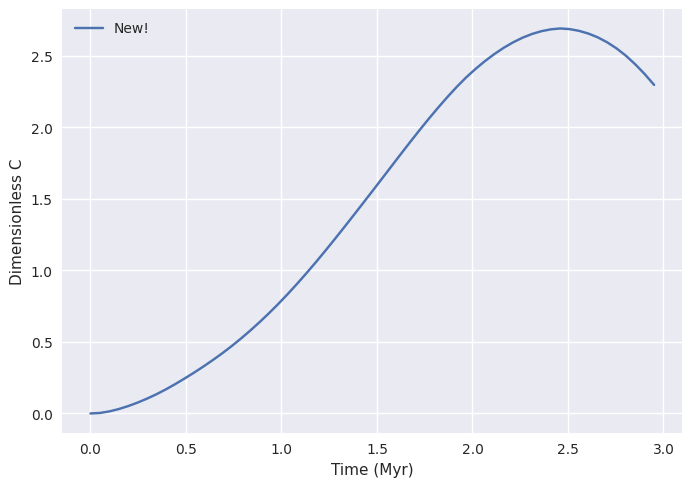

In [296]:
# Gravitational Attraction of DM Wake
CLogDF2 = -1*np.array(graddata)[:,1] * PyUL.length_unit/PyUL.time_unit**2 # 1 Code Acceleration Unit

# Phi is already in m/s^2 

Crel = CLogDF2*vRel0**2/(4*np.pi*PyUL.convert_back(Density,'kg/m3','d')*PyUL.G**2*mBH_kg)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(Tp,Crel,label = 'New!')
ax.set_xlabel('Time (Myr)')
ax.set_ylabel("Dimensionless C")
ax.legend()
plt.show()

CrelMax = np.max(Crel)

The gravitational cut-off b is the largest value we can handle in one dimension, b = 1.2043451789697688kpc


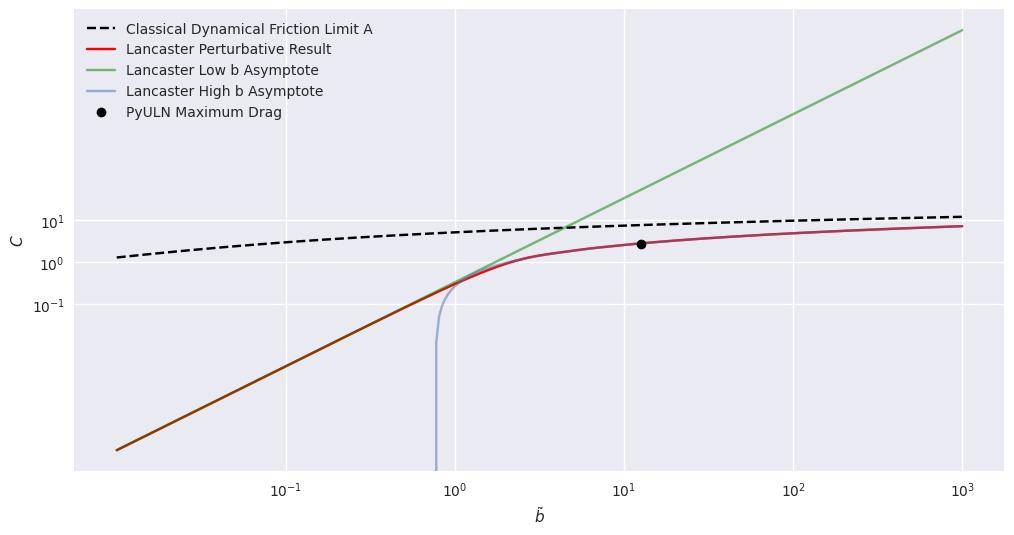

In [305]:
# Hui

BLine = np.linspace(-2,3,300)

BLineX = 10**BLine

rSys = PyUL.convert_between(length*BLineX,length_units,'m','l')

Lambda = vRel0[0]**2*rSys/(PyUL.G*mBH_kg)




# Classical B

C_Cl = np.log(2*Lambda) - 1 + 1/Lambda*np.log(2*Lambda)


F_Cl = 4*np.pi*PyUL.G**2*mBH_kg**2*Density*PyUL.convert_back(1,'kg/m3','d')/(vRel0[0]**2)*C_Cl / FRel[0]

# Classical A

C_A = (1+Lambda)/(Lambda)*np.arctanh(np.sqrt(Lambda**2+2*Lambda)/(1+Lambda)) - np.sqrt(1+2/Lambda)


plt.figure(figsize = (12,6))



plt.loglog(BLineX,C_A,'k--',label = 'Classical Dynamical Friction Limit A')

#plt.loglog(BLineX,C_Cl,'--',label = 'Classical Dynamical Friction Limit B')

from scipy.special import sici as SiCin

Sb,Cb = SiCin(2*BLineX)

RealCb = np.euler_gamma + np.log(2*BLineX) - Cb

plt.loglog(BLineX,RealCb+np.sin(2*BLineX)/(2*BLineX)-1,'r-', label = 'Lancaster Perturbative Result')


plt.loglog(BLineX,1/3*BLineX**2,color = 'green',label = 'Lancaster Low b Asymptote',alpha = 0.5)


from scipy.special import digamma as Dig

beta = PyUL.G*mBH_kg/(vRel0[0]**2*lR[0])

plt.loglog(BLineX,np.log(2*BLineX)-1-np.real(Dig(1+1j*beta)),
           label = 'Lancaster High b Asymptote', alpha = 0.5)




# ?
BCut = length # maximum simulated distance is the domain's volume diagonal

print(f'The gravitational cut-off b is the largest value we can handle in one dimension, b = {BCut}{length_units}')

    
BCutTilde = PyUL.convert_between(BCut,length_units,'pc','l')/lRP

plt.loglog([BCutTilde[0]],[CrelMax],'ko',label = 'PyULN Maximum Drag')

plt.xticks([0.1,1,10,100,1000])
plt.yticks([0.1,1,10])

plt.xlabel('$\~{b}$')
plt.ylabel('$C$ ')


plt.legend()



In [ ]:
plt.plot(BCutTilde,Crel)

In [ ]:
plt.plot(Tp,Crel)

In [ ]:
plt.plot(Tp,BCutTilde)